In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
from shapely.geometry import Point
from tqdm import tqdm
tqdm.pandas(desc="CRS transformation")

In [2]:
DMA_shp_path = r"D:\qing_research\1_rainfall_water\1_rainfall_water_network\data\Geo\DMA\DMA shape file\DMA.shp"
flood_shp_path = r"D:\qing_research\1_rainfall_water\1_rainfall_water_network\data\Geo\flood\Recorded_Flood_Outlines\Recorded_Flood_OutlinesPolygon.shp"
soil_shp_path = r"D:\qing_research\1_rainfall_water\1_rainfall_water_network\data\Geo\soil\SPMM_1km\SoilParentMateriall_V1_portal1km.shp"

In [3]:
dma_centroid_path = r"D:\qing_research\1_rainfall_water\1_rainfall_water_network\data\Geo\DMA_with_centroid.csv"

In [4]:
dma_centroid = pd.read_csv(dma_centroid_path)

In [5]:
dma_centroid['centroid']

0        POINT (-0.3726786471348705 52.75033759147609)
1        POINT (1.1697809285993002 52.083742387264635)
2         POINT (-1.171914782454227 52.18571141462913)
3       POINT (-0.3130733755391288 52.705446336193404)
4        POINT (-0.3646283910940337 52.66840175546201)
                             ...                      
2947      POINT (1.3099464764487485 51.98619181538576)
2948     POINT (0.7357449003954064 51.817827892127525)
2949      POINT (-0.0942345064957386 52.9434846218406)
2950    POINT (-0.6111821211071303 52.839219593936086)
2951     POINT (-0.6819994132739327 52.80391543548552)
Name: centroid, Length: 2952, dtype: object

In [6]:
DMA_shp = gpd.read_file(DMA_shp_path)

In [7]:
DMA_shp.head()

,NETWORKBOU,MIDPOINTGR,DMALONGNAM,DZ_SHORT_N,PZ_SHORT_N,DMA_MODELL,DMA_MODE00,NETWORK_MA,DMASHORTNA,WSZSHORTNA,...,DWICORRECT,DWIREASON,DWISTATUS,EXPORT_MET,OVERALL_OC,PRIMARY_PU,PRV_TOTALN,HEADROOM_D,DATA_CONFI,geometry
0,Grantham,TF0997418609,BOURNE AUSTERBY DMA,BOURNEDZ,PZ22,Bourne,BOURNWMB,LWSG,BOAUSTMA,KN60,...,None,None,None,NaN,None,None,NaN,None,None,"POLYGON Z ((509782.834 319401.21 0, 509769.971..."
1,Ipswich,TM1727947391,WESTERFIELD DMA,PARKWBDZ,PZ60,Ipswich,IPSWIWMB,NWSI,IPSRT7MA,SS42,...,None,None,None,NaN,None,None,NaN,None,None,"POLYGON Z ((616772.452 246338.985 0, 616775.75..."
2,None,None,None,None,None,None,None,RWSP,PRECWRDV,None,...,None,None,None,NaN,None,None,NaN,None,None,"POLYGON Z ((456664.434 254461.705 0, 456672 25..."
3,Grantham,TF1324513086,LANGTOFT DMA,WLSSTHDZ,PZ22,Market Deeping,MARKEWMB,LWSG,LANGTOMA,KN63,...,None,None,None,NaN,None,None,NaN,None,None,"POLYGON Z ((512112.166 311034.956 0, 512098.55..."
4,Grantham,TF1086809217,WEST DEEPING DMA,TALLPUDZ,PZ22,Stamford,STAMFWMB,LWSG,WDEEPIMA,KN61,...,None,None,None,NaN,None,None,NaN,None,None,"POLYGON Z ((510862.001 309415 0, 510915 309317..."


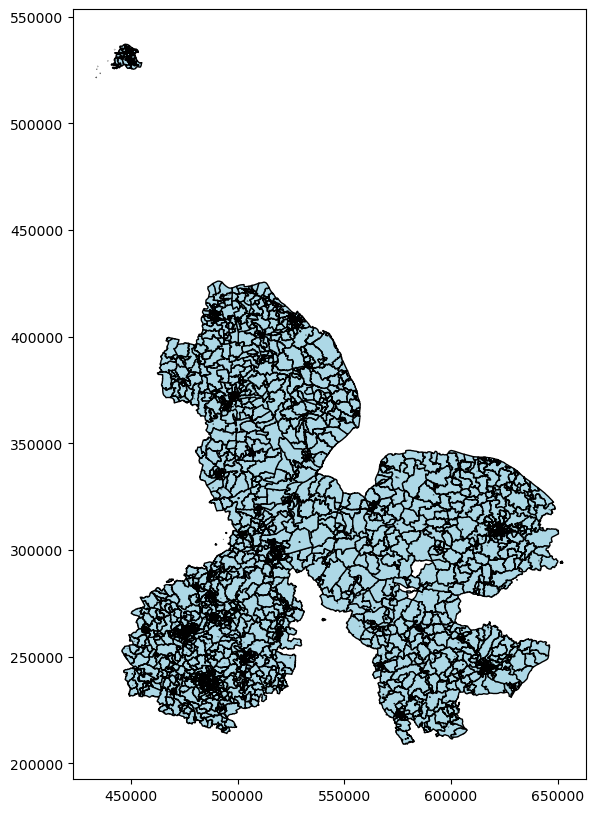

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
DMA_shp.plot(ax=ax,color='lightblue',edgecolor='black')
plt.show()

In [9]:
flood_shp = gpd.read_file(flood_shp_path)

In [10]:
flood_shp.tail()

,rec_out_id,rec_grp_id,name,start_date,end_date,flood_src,flood_caus,fm_status,hfm_status,data_src,fluvial_f,coastal_f,tidal_f,data_prov,data_qual,geometry
30415,4096364,4481.0,This represents flooding in the area in 2012,2012-07-07,2012-11-24,drainage,other,considered and rejected,considered and rejected,Memory,False,False,False,Emergency Services,Poor,"POLYGON ((339898.902 94284.169, 339893.098 942..."
30416,4096365,4481.0,This represents flooding in the area in 2013,2013-01-24,2013-01-24,sewer,other,considered and rejected,considered and rejected,Memory,False,False,False,Public,Poor,"POLYGON ((340544.902 93783.169, 340539.098 937..."
30417,4096347,4481.0,This represents flooding in the area in 1979,1979-03-01,1979-03-01,unknown,unknown,considered and rejected,considered and rejected,Memory,False,False,False,Local Authority,Poor,"POLYGON ((339504.621 95390.235, 339504.369 953..."
30418,4096348,4481.0,This represents flooding in the area in 2000,2000-12-12,2000-12-12,unknown,unknown,considered and rejected,considered and rejected,Memory,False,False,False,Local Authority,Poor,"POLYGON ((339504.989 95390.203, 339504.755 953..."
30419,4096349,4481.0,This represents flooding in the area in 1995,1995-01-31,1995-01-31,unknown,obstruction/blockage - culvert,considered and rejected,considered and rejected,Memory,False,False,False,Local Authority,Poor,"POLYGON ((339510.918 95390.174, 339505.114 953..."


In [11]:
flood_shp['start_date'] = pd.to_datetime(flood_shp['start_date'])

# Filter the DataFrame for records starting from 2020 onwards
flood_shp_2020 = flood_shp[flood_shp['start_date'] >= '2020-01-01'].reset_index(drop = True)

In [12]:
flood_shp_2020.tail()

,rec_out_id,rec_grp_id,name,start_date,end_date,flood_src,flood_caus,fm_status,hfm_status,data_src,fluvial_f,coastal_f,tidal_f,data_prov,data_qual,geometry
878,4094917,4366.0,2020 February Flood Incident - Storm Ciara,2020-02-08,2020-02-14,drainage,local drainage/surface water,considered and rejected,considered and rejected,Satellite - Radar,False,False,False,Environment Agency,Fair,"MULTIPOLYGON (((419848.049 403034.453, 419838 ..."
879,4094918,4366.0,2020 February Flood Incident - Storm Ciara,2020-02-08,2020-02-14,drainage,local drainage/surface water,considered and rejected,considered and rejected,Satellite - Radar,False,False,False,Environment Agency,Fair,"MULTIPOLYGON (((395138.161 451720.037, 395159...."
880,4095963,4451.0,Course Lane,2020-02-09,2020-02-10,unknown,unknown,considered and rejected,considered and rejected,Other,False,False,False,Local Authority,Good,"POLYGON ((348234.132 410307.011, 348233.026 41..."
881,4095964,4451.0,Town Green Lane,2020-02-09,2020-02-10,unknown,unknown,considered and rejected,considered and rejected,Other,False,False,False,Local Authority,Good,"POLYGON ((340514.683 405735.323, 340512.937 40..."
882,4095965,4451.0,Kittlingbounre Brow\n\nKittlingbounre Brow,2020-02-09,2020-02-10,main river,other,considered and rejected,considered and rejected,Other,True,False,False,Local Authority,Good,"POLYGON ((357565.087 427536.04, 357563.235 427..."


In [13]:
# Extract the year from the 'start_date' column
flood_shp_2020['year'] = flood_shp_2020['start_date'].dt.year

# Count the number of records for each year
year_counts = flood_shp_2020['year'].value_counts().sort_index()

# Display the counts for 2020, 2021, and 2022
year_counts.loc[[2020, 2021, 2022,2023,2024]]

year
2020    353
2021    123
2022     65
2023    223
2024    119
Name: count, dtype: int64

In [14]:
if DMA_shp.crs != flood_shp_2020.crs:
    with tqdm(total=1,desc="Transforming CRS", unit="step") as pbar:
        flood_shp_2020 = flood_shp_2020.to_crs(DMA_shp.crs)
        pbar.update(1)



In [15]:
intersection = gpd.overlay(DMA_shp,flood_shp_2020,how='intersection')

In [19]:
dma_flood_overlap = intersection[['DMASHORTNA','geometry','start_date', 'end_date']]
dma_flood_overlap

,DMASHORTNA,geometry,start_date,end_date
0,WILSTWMA,"POLYGON Z ((490595.3 378726.6 0, 490597.2 3787...",2023-10-20,2023-10-23
1,WILSTWMA,"MULTIPOLYGON Z (((490385 382599 0, 490387 3825...",2023-10-20,2023-10-23
2,WILSTWMA,"MULTIPOLYGON Z (((491034.884 378953.82 0, 4910...",2023-10-20,2023-10-23
3,WILSTWMA,"MULTIPOLYGON Z (((490380 382368 0, 490398.721 ...",2023-10-20,2023-10-23
4,WILSTWMA,"MULTIPOLYGON Z (((490774.612 379959.294 0, 490...",2024-01-02,2024-01-09
...,...,...,...,...
370,LNGBENMA,"MULTIPOLYGON Z (((483102.034 346327.233 0, 483...",2024-01-02,2024-01-09
371,LNGBENMA,"POLYGON Z ((483933.323 344526.812 0, 483920.62...",2024-01-02,2024-01-09
372,LNGBENMA,"POLYGON Z ((483787.234 345153.604 0, 483784.32...",2024-01-02,2024-01-09
373,BRIGSVMA,"MULTIPOLYGON Z (((494506.656 285407.422 0, 494...",2020-12-23,2020-12-24


In [21]:
dma_flood_overlap['year'] = dma_flood_overlap['start_date'].dt.year
year_counts = dma_flood_overlap['year'].value_counts().sort_index()
year_counts.loc[[2020,2023,2024]]

C:\Users\doum3\.conda\envs\my_env\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


year
2020     21
2023    223
2024    131
Name: count, dtype: int64

In [31]:
flood_matches

,NETWORKBOU,MIDPOINTGR,DMALONGNAM,DZ_SHORT_N,PZ_SHORT_N,DMA_MODELL,DMA_MODE00,NETWORK_MA,DMASHORTNA,WSZSHORTNA,...,flood_caus,fm_status,hfm_status,data_src,fluvial_f,coastal_f,tidal_f,data_prov,data_qual,year
2481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWSG,WPINWWDV,NaN,...,other,considered and accepted,considered and accepted,Aerial Photography,True,False,False,Environment Agency,Good,2024


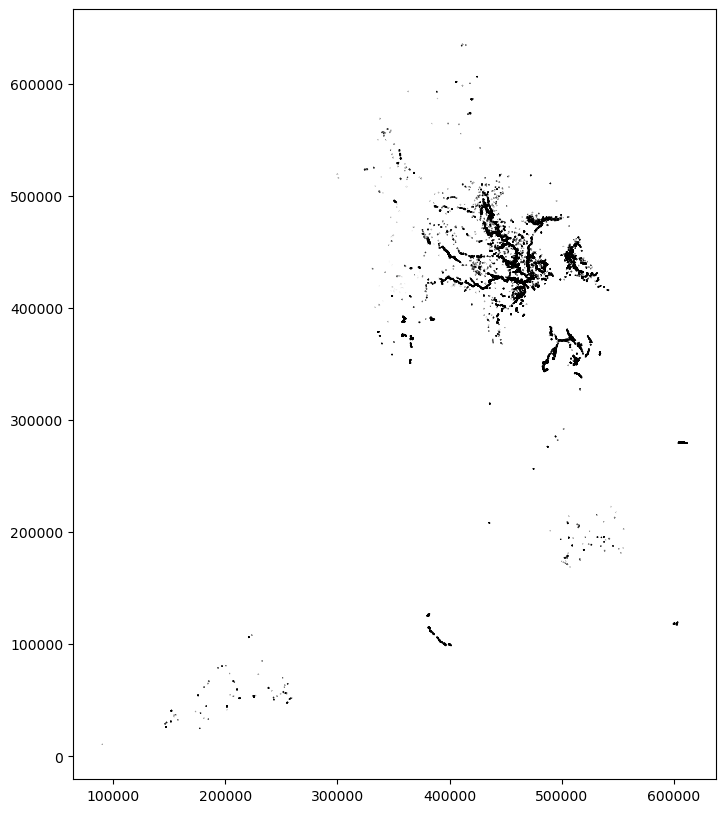

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
flood_shp_2020.plot(ax=ax,color='lightblue',edgecolor='black')
plt.show()

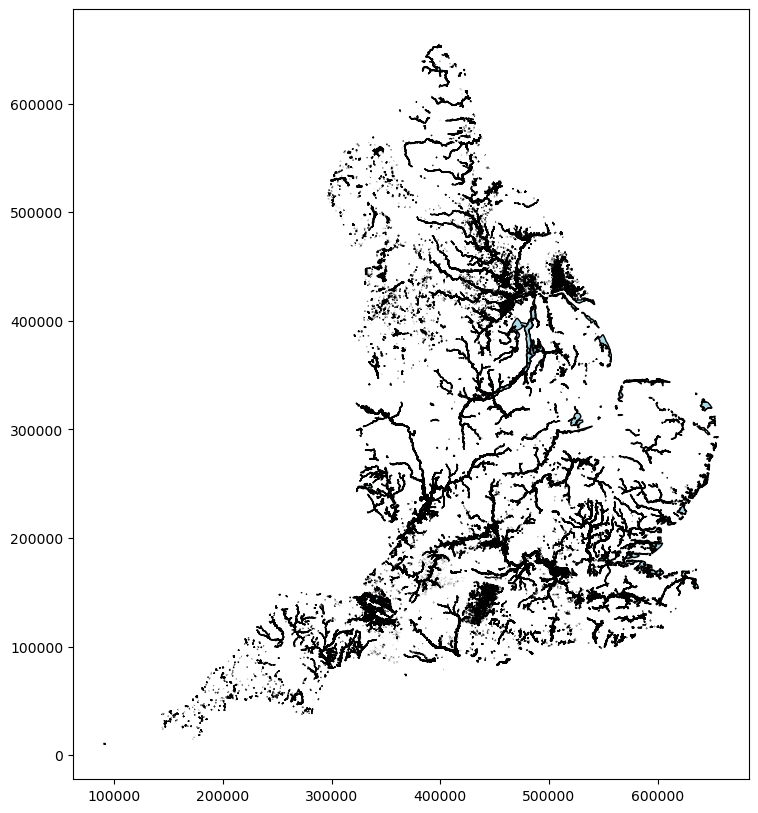

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
flood_shp.plot(ax=ax,color='lightblue',edgecolor='black')
plt.show()

In [29]:
soil_shp = gpd.read_file(soil_shp_path)
soil_shp.head()

,ESB_DESC,CARB_CNTNT,PMM_GRAIN,SOIL_GROUP,SOIL_TEX,SOIL_DEPTH,PMM1K_UID,VERSION,geometry
0,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_1,DPSPM_V1_1km,"POLYGON ((54000.002 784200.004, 54000.002 7843..."
1,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_2,DPSPM_V1_1km,"POLYGON ((54000.002 783200.001, 54000.002 7834..."
2,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_3,DPSPM_V1_1km,"POLYGON ((54000.002 782199.997, 54000.002 7824..."
3,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_4,DPSPM_V1_1km,"POLYGON ((54000.002 781200.003, 54000.002 7813..."
4,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_5,DPSPM_V1_1km,"POLYGON ((54000.002 780199.999, 54000.002 7804..."


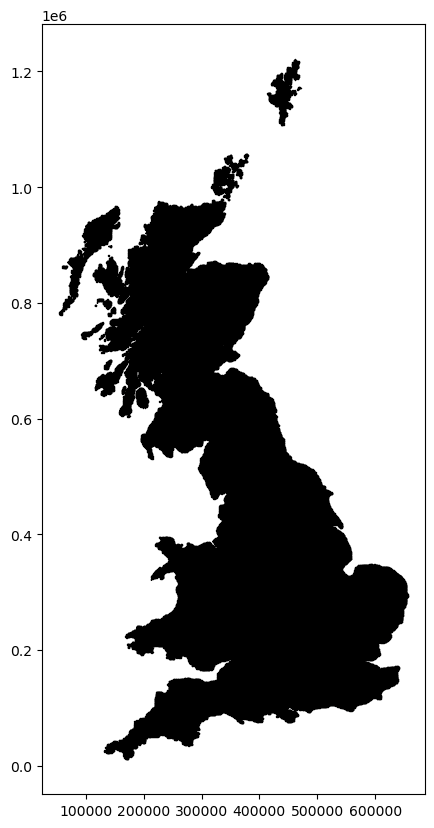

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
soil_shp.plot(ax=ax,color='lightblue',edgecolor='black')
plt.show()